In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Titanic = pd.read_csv('titanic_train.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Titanic.shape

(891, 12)

In [4]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

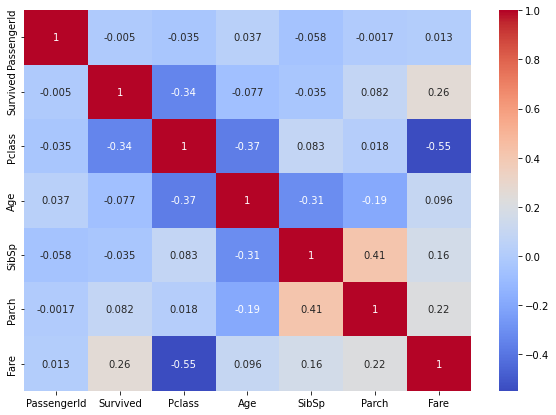

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(Titanic.corr(),cmap='coolwarm',annot=True);

In [8]:
Titanic = Titanic.drop(columns='Cabin', axis=1)

In [9]:
Titanic['Age'].fillna(Titanic['Age'].mean(), inplace=True)
Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace=True)

In [10]:
print(Titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
Titanic.Embarked=Titanic.Embarked.astype('str')
Titanic.Embarked=LE.fit_transform(Titanic.Embarked)
Titanic.Sex = LE.fit_transform(Titanic.Sex)

In [13]:
Titanic.drop(['PassengerId', 'Name', 'Ticket'],axis= 1, inplace=True)
Titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [14]:
Titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


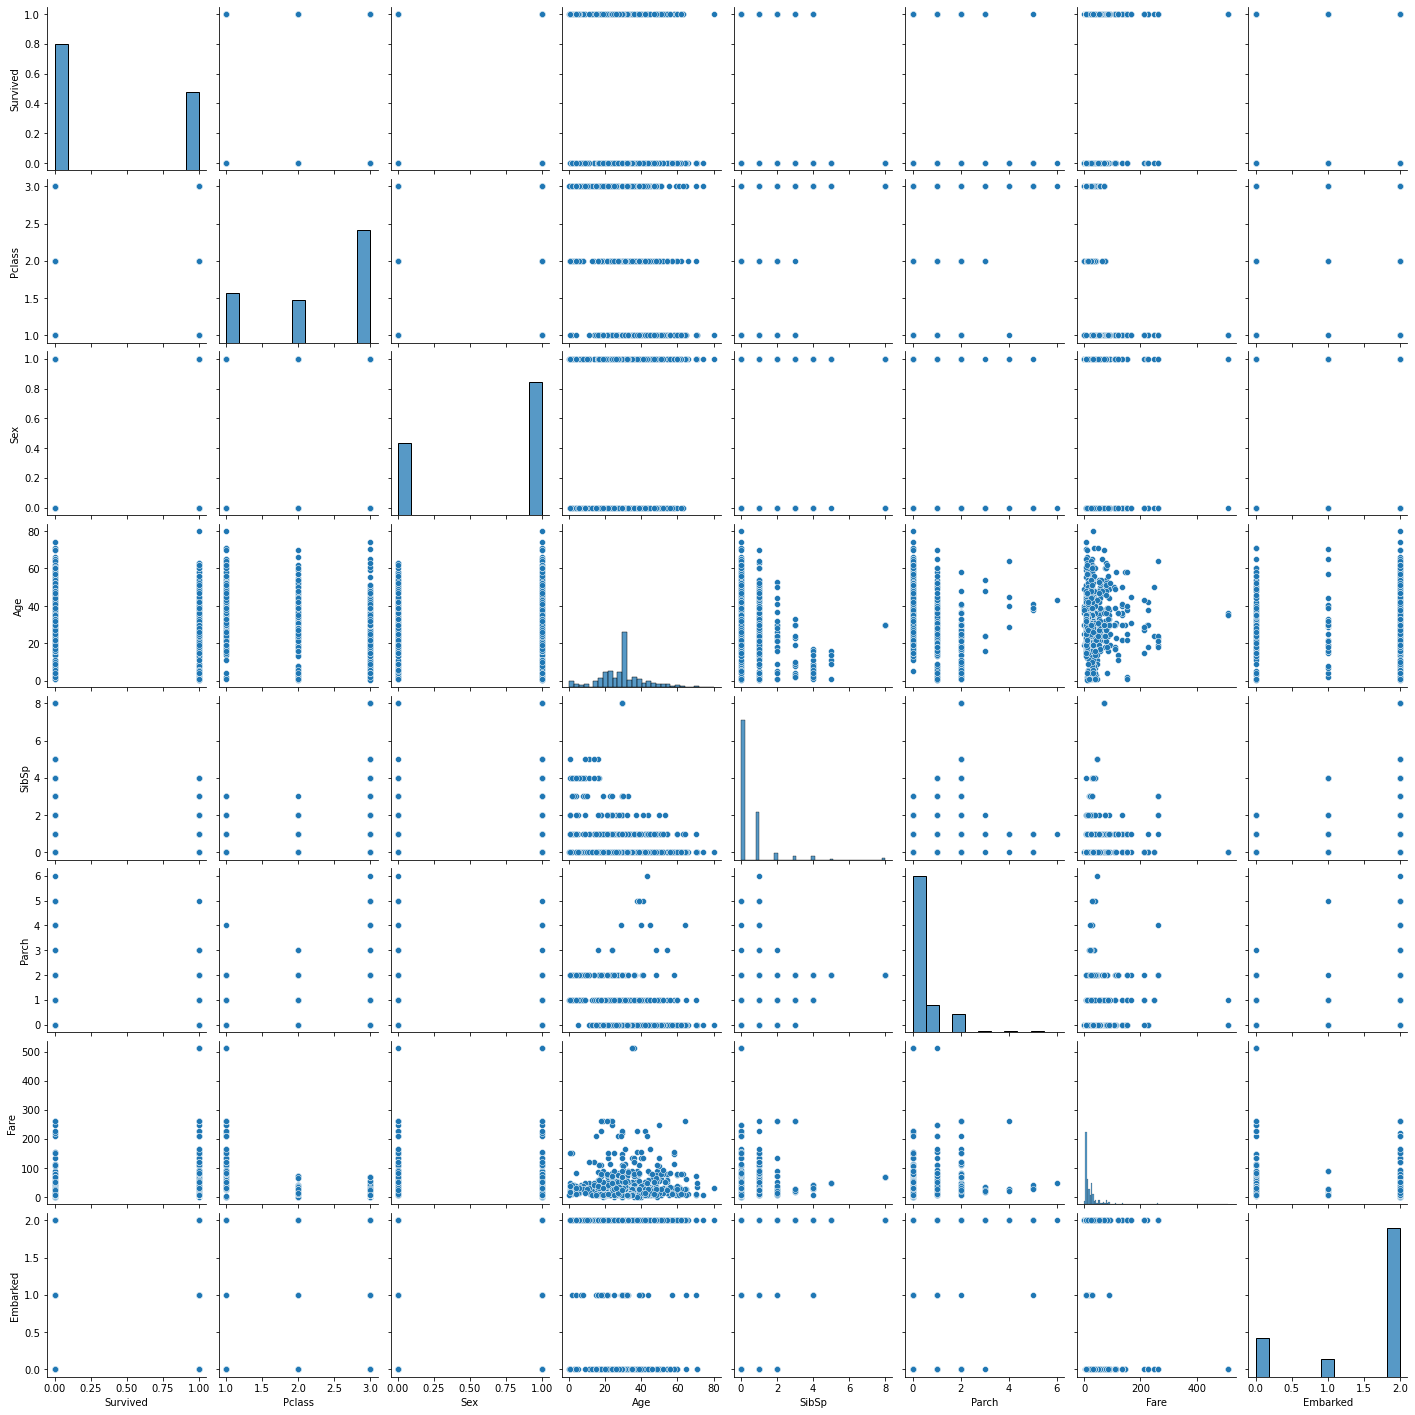

In [15]:
sns.pairplot(Titanic);

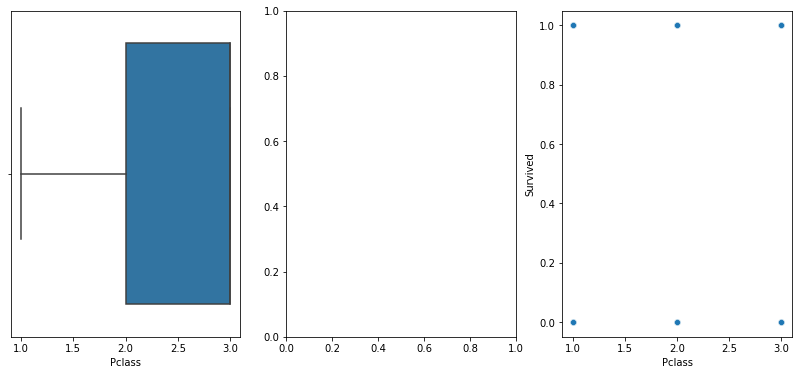

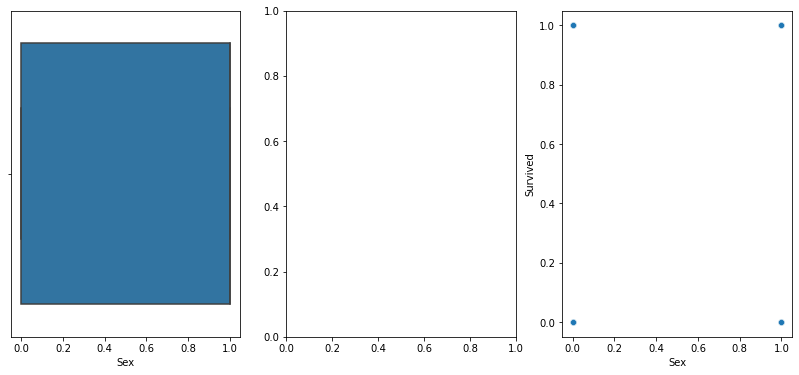

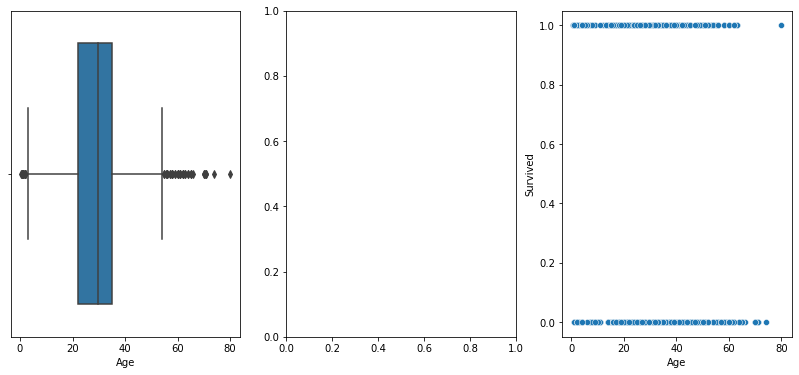

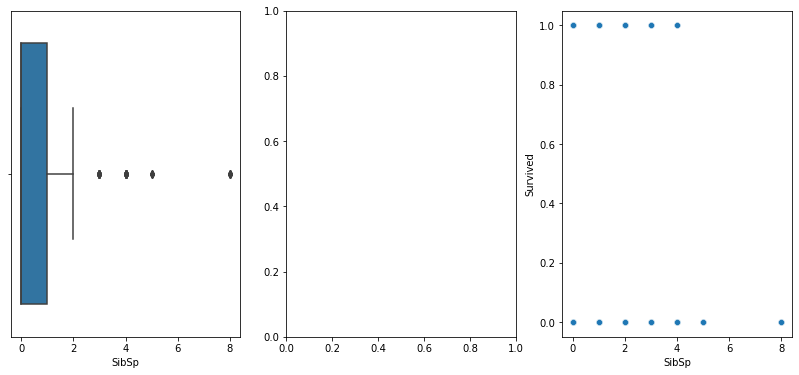

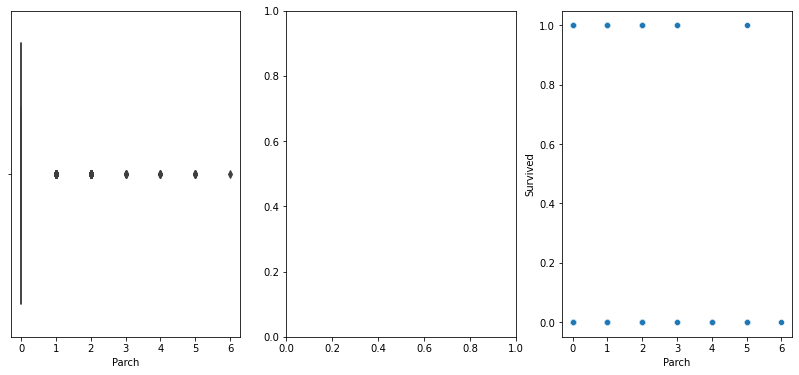

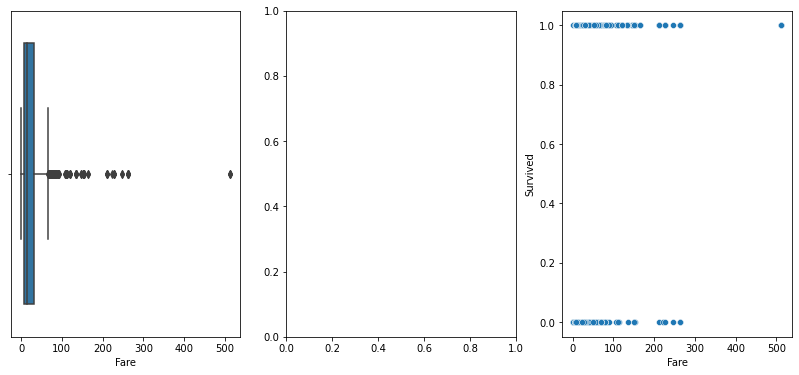

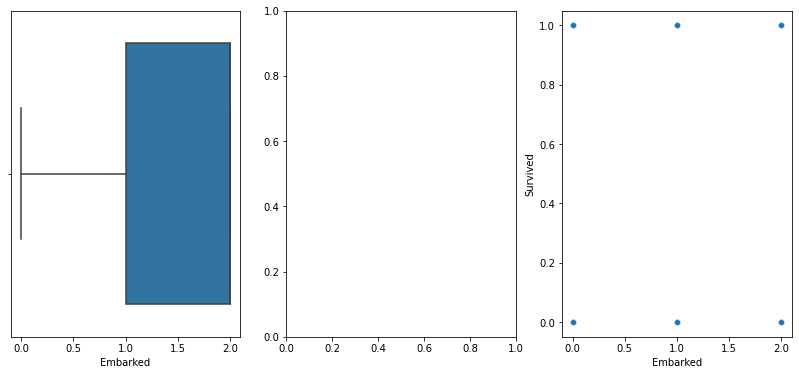

In [16]:
target = "Survived"
feature = ["Pclass",'Sex','Age','SibSp','Parch','Fare','Embarked']

def num_plots(feature_name):
    fig, axs = plt.subplots(1,3,figsize=(14,6))
    sns.boxplot(x = Titanic[feature_name],ax=axs[0])
    sns.scatterplot(data = Titanic, x=feature_name,y=target,ax=axs[2]);
    
for i in feature:
    num_plots(i)

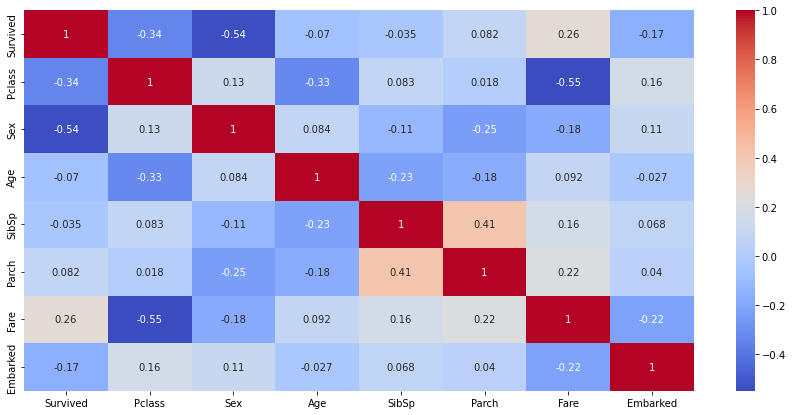

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(Titanic.corr(),cmap="coolwarm",annot=True);

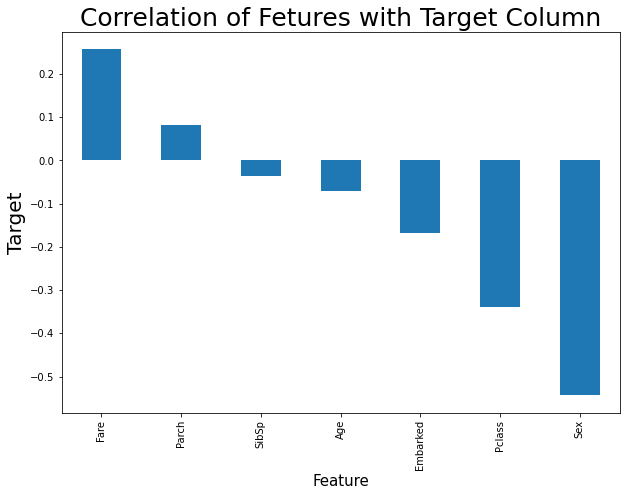

In [18]:
plt.figure(figsize = (10,7))
Titanic.corr()["Survived"].sort_values(ascending=False).drop(['Survived']).plot.bar()
plt.xlabel("Feature",fontsize= 15)
plt.ylabel('Target',fontsize= 20)
plt.title("Correlation of Fetures with Target Column",fontsize=25);

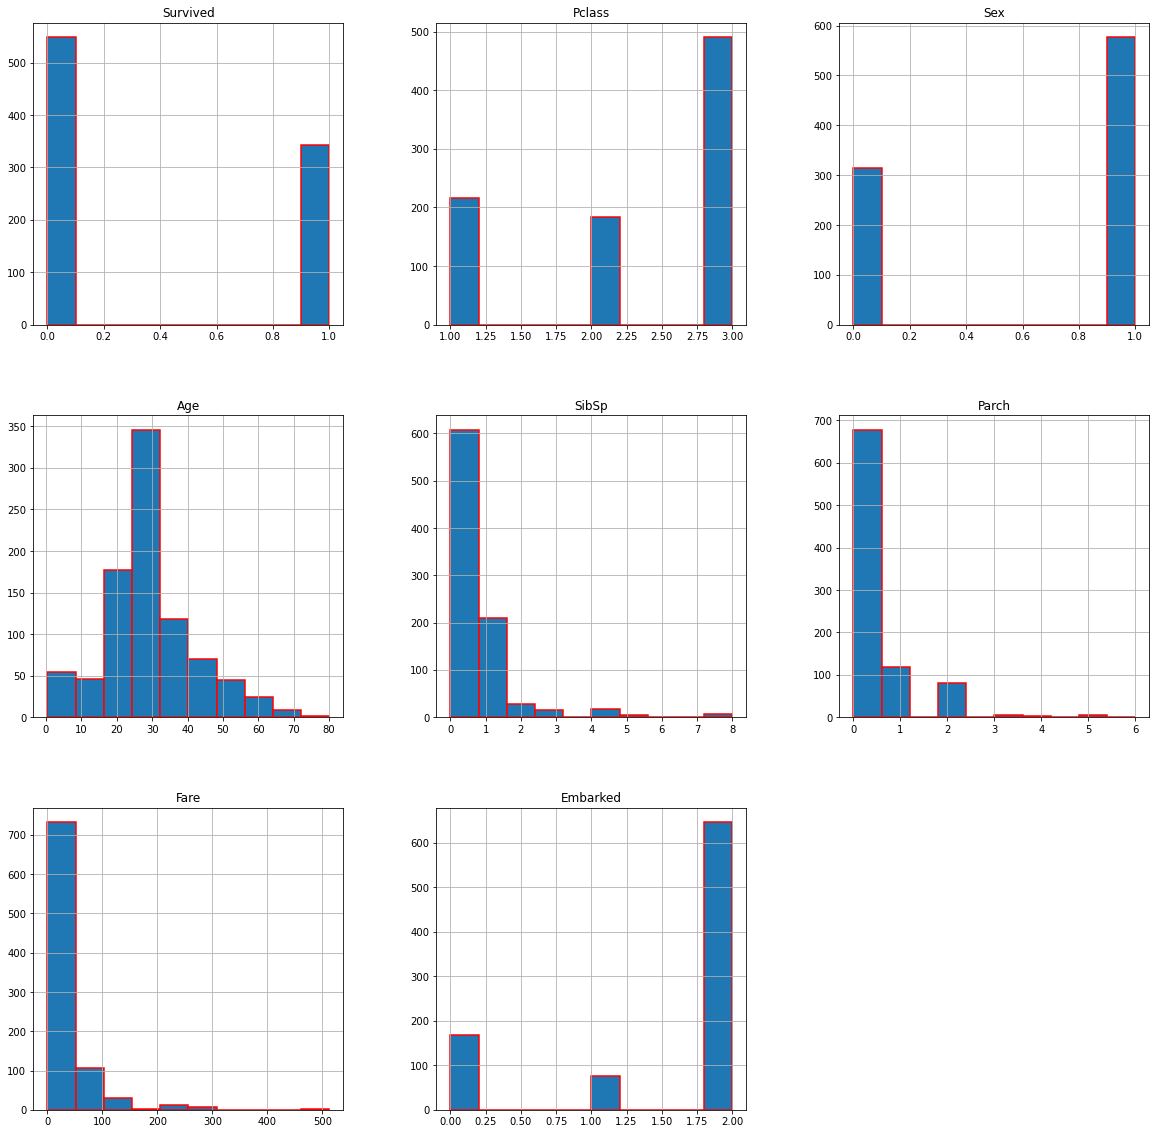

In [19]:
Titanic.hist(edgecolor = 'red',linewidth = 1.5,figsize=(20,20));

In [20]:
X = Titanic.drop(["Survived"],axis = 1)
Y = Titanic.Survived

In [21]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
Scaled = SC.fit_transform(X)

In [22]:
Scaled

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [24]:
Accu = 0
X_train,X_test,Y_train,Y_test = train_test_split(Scaled,Y,test_size=.25,shuffle=True)
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
Acc = accuracy_score(Y_test,Y_pred)
if Acc> Accu:
    Accu = Acc
print(f"Best Accuracy {Accu*100}")

Best Accuracy 81.16591928251121


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(Scaled,Y,test_size=.25,shuffle=True)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
LG = [LogisticRegression(),GaussianNB()]

for lg in LG:
    lg.fit(X_train,Y_train)
    print('Model Score :',lg.score(X_train,Y_train))
    lg_pred = lg.predict(X_test)
    print(f"Accuracy Score of {lg} is :",accuracy_score(Y_test,lg_pred),"\n\n")
    print(f"Confusion Metrics of {lg} is :\n\n",confusion_matrix(Y_test,lg_pred),"\n\n")
    print(f"Classification Report of {lg} is :\n",classification_report(Y_test,lg_pred),"\n\n")
    print(f"Roc Auc Score Of {lg} is :",roc_auc_score(Y_test,lg_pred),"\n\n")    
    print("----------------------------------*********--------------------------------------")
    print()

Model Score : 0.7859281437125748
Accuracy Score of LogisticRegression() is : 0.8475336322869955 


Confusion Metrics of LogisticRegression() is :

 [[129  14]
 [ 20  60]] 


Classification Report of LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       143
           1       0.81      0.75      0.78        80

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223
 


Roc Auc Score Of LogisticRegression() is : 0.826048951048951 


----------------------------------*********--------------------------------------

Model Score : 0.781437125748503
Accuracy Score of GaussianNB() is : 0.820627802690583 


Confusion Metrics of GaussianNB() is :

 [[122  21]
 [ 19  61]] 


Classification Report of GaussianNB() is :
               precision    recall  f1-score   support

           0       0.87      0.85      0.8

In [37]:
SD = [ SVC(), DecisionTreeClassifier()]

for m in SD:
    
    m.fit(X_train,Y_train)
    print("Model Score :" ,m.score(X_train,Y_train))
    sd_predm = m.predict(X_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(Y_test,sd_predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n",confusion_matrix(Y_test,sd_predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(Y_test,sd_predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(Y_test,m.predict(X_test)),"\n\n")
    print("------------------------------*******---------------------------------------")
    print('\n')

Model Score : 0.8248502994011976
Accuracy Score of  SVC() is : 0.852017937219731 


ConfusionMatrix of  SVC() is :
 [[130  13]
 [ 20  60]] 


classification_report of  SVC() is :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       143
           1       0.82      0.75      0.78        80

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223
 


roc_auc_score of SVC()  is : 0.8295454545454545 


------------------------------*******---------------------------------------


Model Score : 0.9835329341317365
Accuracy Score of  DecisionTreeClassifier() is : 0.8251121076233184 


ConfusionMatrix of  DecisionTreeClassifier() is :
 [[124  19]
 [ 20  60]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       143
           1 